# DS 200 Final Project


--- Aryamaan Shiv

# Front Matter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm
mpl.rcParams.update({'mathtext.default': 'regular'})
mpl.rcParams.update({'lines.markeredgecolor': 'black'})
mpl.rcParams.update({'lines.markersize': 10})
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
import geopandas as gpd

In [ ]:
data_path = '/content/drive/MyDrive/2018.csv'
happiness = pd.read_csv(data_path)

In [ ]:
print(happiness.describe())

       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.375917        0.891449        1.213237   
std       45.177428    1.119506        0.391921        0.302372   
min        1.000000    2.905000        0.000000        0.000000   
25%       39.750000    4.453750        0.616250        1.066750   
50%       78.500000    5.378000        0.949500        1.255000   
75%      117.250000    6.168500        1.197750        1.463000   
max      156.000000    7.632000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.597346                      0.454506    0.181006   
std                   0.247579                      0.162424    0.098471   
min                   0.000000                      0.000000    0.000000   
25%             

# About the dataset

The dataset I'm analyzing, referred to as the "happiness" dataset, was sourced from the annual World Happiness Report, which ranks global happiness in various countries around the world. The dataset is rich, comprising 156 cases, each representing a different country. For each country, the dataset includes several variables that contribute to the overall happiness score:

Overall rank
Country or region
Score (happiness score)
GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Generosity
Perceptions of corruption

Each of these variables is a piece of the puzzle that, when combined, gives us a comprehensive picture of the happiness and well-being of a nation's citizens.



# Research Question

How do factors such as economic prosperity, social support networks, and health impact the overall happiness and contentment of a country's population

This question delves into understanding which aspects—economic, social, or health—have the most substantial influence on a nation's happiness. It can help us find out if wealthier countries are necessarily happier or if the strength of community bonds and the health of citizens play a more significant role in shaping the well-being of societies.

# Exploratory data analysis (EDA)

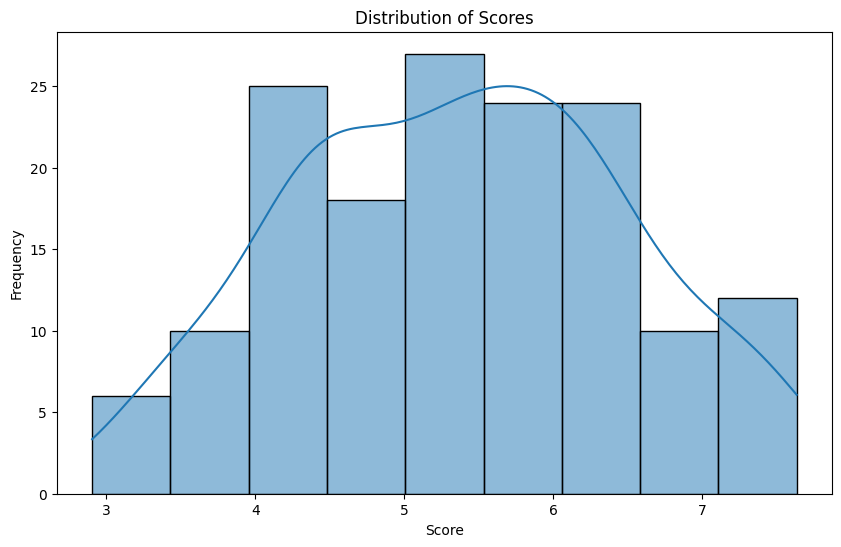

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(happiness['Score'], kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of happiness scores across different countries. The shape of the distribution appears roughly bell-shaped, indicating a normal-like distribution of happiness scores, with most countries clustered around the middle range. The peak of the histogram suggests that the most common happiness scores are between 5 and 6. There are fewer countries with very low or very high happiness scores, as evidenced by the tails of the distribution.

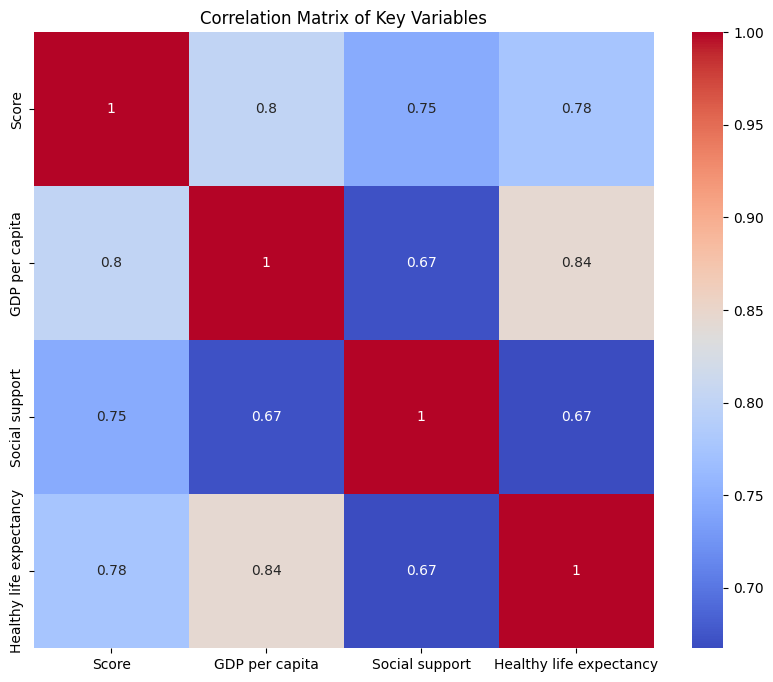

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = happiness[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Variables')
plt.show()

The correlation matrix provides a visual and numerical representation of the strength of the relationship between four key variables: happiness score, GDP per capita, social support, and healthy life expectancy. The matrix shows strong positive correlations between all pairs of variables, with coefficients ranging from 0.67 to 0.84. Notably, the happiness score has a very high correlation with GDP per capita (0.8) and healthy life expectancy (0.78), indicating that as these factors increase, the happiness score tends to increase as well. The correlation between happiness score and social support is also strong (0.75), suggesting that emotional and social support networks are important factors in determining a country’s happiness score. Overall, the high correlation coefficients suggest that economic and social factors are significant contributors to the happiness of a nation, and improvements in these areas are likely associated with higher happiness scores.

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(happiness, how='left', left_on='name', right_on='Country or region')

<ipython-input-7-8ada495b49fa>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


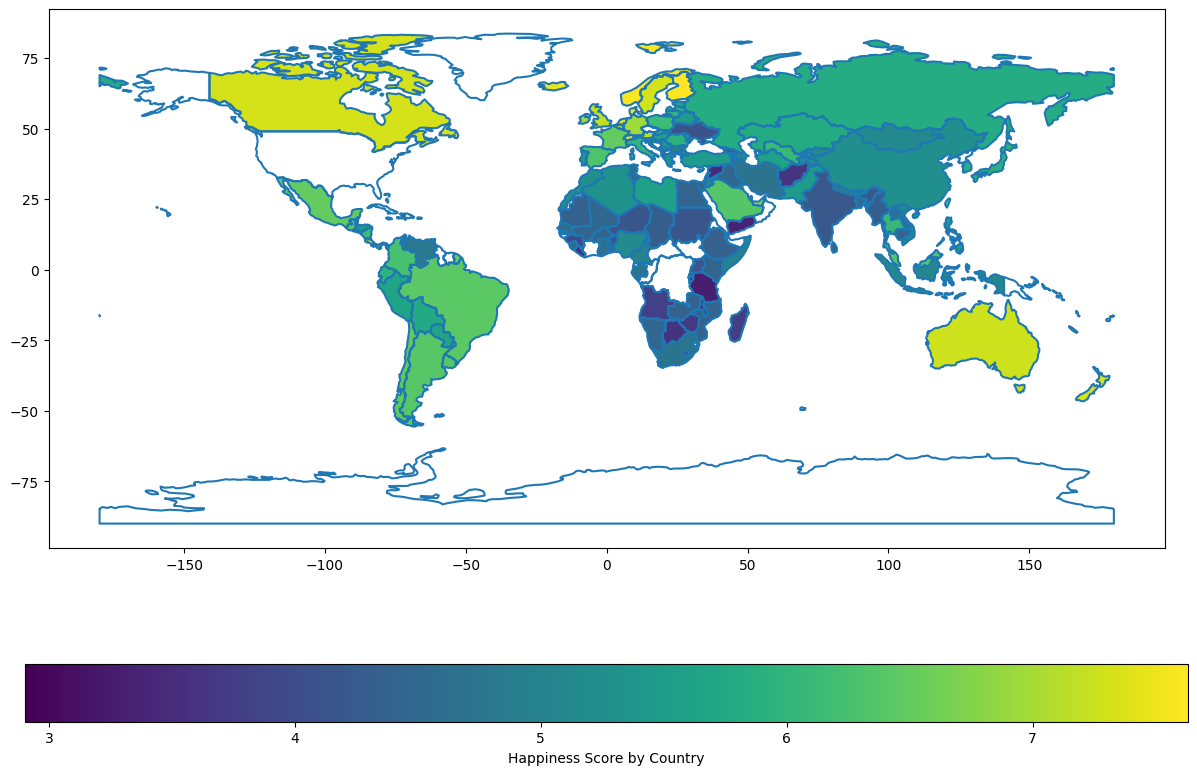

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Score', ax=ax, legend=True,
           legend_kwds={'label': "Happiness Score by Country",
                        'orientation': "horizontal"})
plt.show()

The map gives a visual representation of how happiness is distributed geographically across the globe, with each country coloured according to its score. Darker colors indicate lower happiness scores, while lighter or warmer colors indicate higher scores. Certain regions such as Northern Europe or North America having lighter colors, suggesting higher happiness scores, while other regions have darker colors.

# Hypothesis Test

Null Hypothesis (H0): There is no effect of GDP per capita, social support, and healthy life expectancy on the happiness score of a country.

Alternative Hypothesis (H1): At least one of the factors significantly affects the happiness score of a country.

In [ ]:
X = happiness[['GDP per capita', 'Social support', 'Healthy life expectancy']]
y = happiness['Score']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     140.6
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           1.21e-43
Time:                        01:26:56   Log-Likelihood:                -134.84
No. Observations:                 156   AIC:                             277.7
Df Residuals:                     152   BIC:                             289.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
p_values = model.pvalues
print("P-values for the regression coefficients:")
print(p_values)

P-values for the regression coefficients:
const                      7.466138e-23
GDP per capita             4.500624e-06
Social support             4.472832e-08
Healthy life expectancy    5.517124e-03
dtype: float64


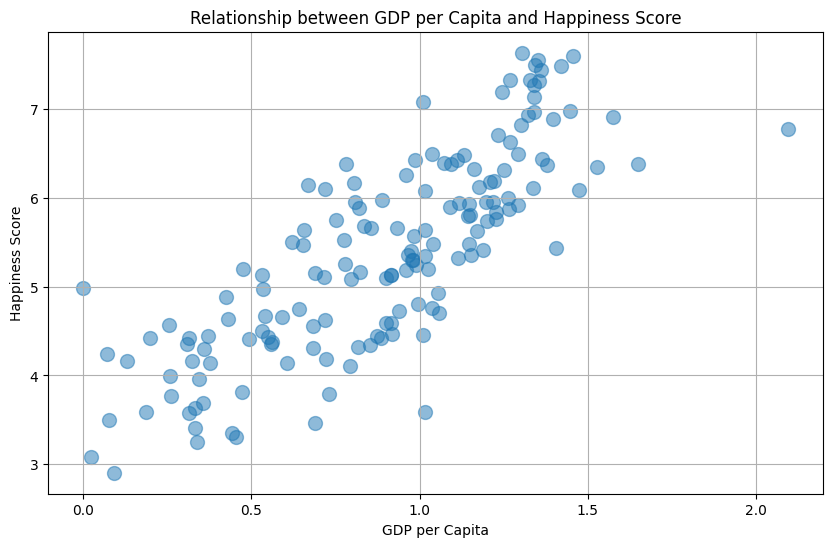

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(happiness['GDP per capita'], happiness['Score'], alpha=0.5)
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

This graph illustrates that as GDP per capita increases, happiness scores also tend to increase. This suggests that countries with higher GDP per capita tend to report higher levels of happiness. The upward trend in the scatter points indicates a positive association between economic wealth and perceived happiness.

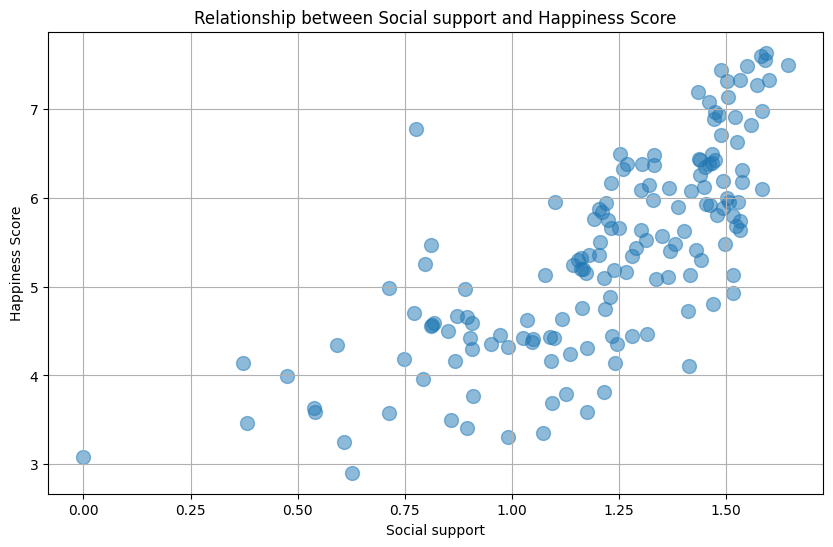

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(happiness['Social support'], happiness['Score'], alpha=0.5)
plt.title('Relationship between Social support and Happiness Score')
plt.xlabel('Social support')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

This graph focuses on the connection between social support and happiness scores. It also shows a positive trend: countries with higher reported levels of social support tend to have higher happiness scores.

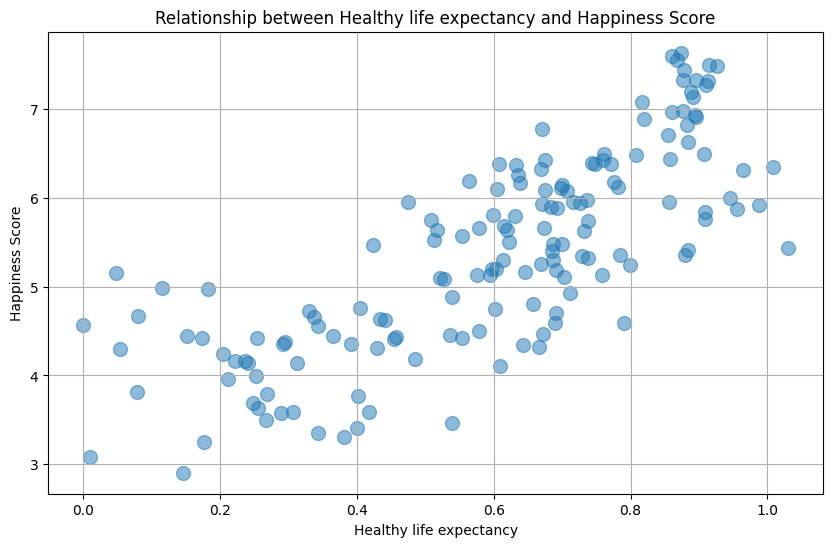

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(happiness['Healthy life expectancy'], happiness['Score'], alpha=0.5)
plt.title('Relationship between Healthy life expectancy and Happiness Score')
plt.xlabel('Healthy life expectancy')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

This graph relates healthy life expectancy to happiness scores. Here again, there's a positive trend. Countries where citizens have a longer healthy life expectancy tend to have higher happiness scores, indicating that health is a significant contributor to overall happiness.

In [ ]:
prediction_data = pd.DataFrame({
    'const': 1,
    'GDP per capita': [0.891, 0.950, 1.198, 0.616, 0.616],
    'Social support': [1.213, 1.255, 1.463, 1.067, 1.463],
    'Healthy life expectancy': [0.597, 0.644, 0.777, 0.422, 0.644]
})

In [ ]:
predictions = model.get_prediction(prediction_data)
prediction_summary = predictions.summary_frame(alpha=0.05)  # 95% PI
print(prediction_summary[['obs_ci_lower', 'obs_ci_upper']])

   obs_ci_lower  obs_ci_upper
0      4.221567      6.527980
1      4.386708      6.693390
2      5.051632      7.363780
3      3.556211      5.866624
4      4.260647      6.601357


## Prediction Interval

Mean Values Scenario (Index 0):

Prediction Interval: 4.22 to 6.53
This interval suggests that under average global conditions, the happiness score could vary significantly. The wider range indicates that even under average conditions, there could be substantial variability in happiness due to factors not captured by the model.


Median Values Scenario (Index 1):

Prediction Interval: 4.39 to 6.69
Similar to the mean values, this scenario under median conditions also shows a considerable range. This suggests that the central tendency of the data points still encompasses a broad spectrum of happiness outcomes.


High Values Scenario (Index 2):

Prediction Interval: 5.05 to 7.36
As expected, higher values of GDP per capita, social support, and healthy life expectancy predict higher happiness scores. The interval is higher on the scale, indicating that in affluent and supportive countries, people tend to be happier, but there's still a range suggesting variability.


Low Values Scenario (Index 3):

Prediction Interval: 3.56 to 5.87
Reflecting less fortunate conditions, this prediction interval is lower overall but still shows a significant range. This indicates that even among countries with lower GDP, social support, and health metrics, there's variability in how these factors translate into happiness.


Custom Scenario (High Social Support with Low GDP and Average Health) (Index 4):

Prediction Interval: 4.26 to 6.60
This scenario shows that high social support can potentially offset some of the negative effects of a lower GDP when combined with average health conditions. The range is quite broad, reflecting the complex interplay between these variables.

## Conclusion

The results strongly support the alternative hypothesis (H1) that at least one of GDP per capita, social support, and healthy life expectancy significantly affects the happiness score. In fact, all three factors have significant positive effects on happiness scores across countries.

Wealth Matters, But It's Not Everything: Our findings indicate that a country's wealth, as measured by GDP per capita, does have a positive relationship with the happiness scores of its citizens. However, it's not the sole contributor to happiness. This implies that while economic prosperity can enhance quality of life, it doesn't guarantee happiness.

Social Support is Key: The data strongly suggests that social support is a critical component of happiness. In countries where people feel they have someone to rely on during tough times, happiness scores tend to be higher. This emphasizes the importance of nurturing strong community ties and ensuring that social support networks are in place.

Health is Wealth: Healthier lifestyles and longer life expectancies correlate with higher happiness scores. This reveals that public health improvements and access to healthcare can significantly boost the overall satisfaction and happiness of a population.

In essence, our analysis paints a picture of happiness as a multi-faceted experience. While money does contribute to well-being, the warmth of human connection and the assurance of good health are just as crucial, if not more so, for fostering a happy and content society.